In [95]:
import pandas as pd
import matplotlib.colors as mpColors
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import gridspec
from datetime import datetime
import ipywidgets as widgets
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import copy
from datetime import datetime
import random

#Lectura de identificadores
#Como los archivos descargados siguen un formato que involucra el identificador, es util tener a mano estos datos para agrupar los datos

f = open("ID_Estaciones.txt", "r")
ids = []
lines = f.readlines()
ids_dict = {}
estaciones = {}

for line in lines:
    temp = line.split(",")
    ids.append(line.split(",")[len(temp) - 1].split("\n")[0])
    ids_dict[line.split(",")[len(temp) - 1].split("\n")[0]] = temp

print(ids)
print(ids_dict)
labels = copy.deepcopy(ids)

['510005', '400009', '180005', '330020', '550001', '270008', '290004', '410005', '430002', '430009', '450001', '450005', '530005', '200006', '330113']
{'510005': ['EstaciÃ³n Teniente Gallardo Puerto Natales Ad.', 'Region de Magallanes y de la Antartica Chilena', '510005\n'], '400009': ['EstaciÃ³n CaÃ±al Bajo Osorno Ad.', 'Region de Los Lagos', '400009\n'], '180005': ['EstaciÃ³n Chacalluta Arica Ap.', 'Region de Arica y Parinacota', '180005\n'], '330020': ['EstaciÃ³n Quinta Normal Santiago', 'Region Metropolitana', '330020\n'], '550001': ['EstaciÃ³n Guardiamarina ZaÃ±artu Pto Williams Ad.', 'Region de Magallanes y de la AntÃ¡rtica Chilena', '550001\n'], '270008': ['EstaciÃ³n Desierto de Atacama Caldera Ad.', 'Region de Atacama', '270008\n'], '290004': ['EstaciÃ³n La Florida La Serena Ad.', 'Region de Coquimbo', '290004\n'], '410005': ['EstaciÃ³n El Tepual Puerto Montt Ap.', 'Region de Los Lagos', '410005\n'], '430002': ['EstaciÃ³n FutaleufÃº Ad.', 'Region de Los Lagos', '430002\n'], '43

In [15]:
bigDf = pd.DataFrame()
for id in ids:
    df = pd.read_excel(id+"_agrupado.xlsx", sheet_name="Sheet1")
    if(bigDf.size == 0):
        bigDf = pd.concat([df.iloc[:,1:]], ignore_index = True)
    else:
        bigDf = pd.concat([bigDf,df.iloc[:,1:]], ignore_index = True)

bigDf["momento"] = pd.to_datetime(bigDf["momento"], format="%d-%m-%Y %H:%M:%S")
bigDf["Nombre_Estacion"] = ""
bigDf["Region"] = ""
for key,value in ids_dict.items():
    bigDf.loc[bigDf["ID_Estacion"] == int(key), "Nombre_Estacion"] = value[0]
    bigDf.loc[bigDf["ID_Estacion"] == int(key), "Region"] = value[1]

bigDf

,ID_Estacion,momento,RR6_Valor(mm),HR_Valor(%),Ts_Valor(°C),ff_Valor(kt),RadGInst (watt/m2),Nombre_Estacion,Region
0,510005,2023-01-01 00:00:00,0.0,57.8,9.7,23.0,78.1,EstaciÃ³n Teniente Gallardo Puerto Natales Ad.,Region de Magallanes y de la Antartica Chilena
1,510005,2023-01-01 01:00:00,NaN,61.6,8.8,22.0,7.7,EstaciÃ³n Teniente Gallardo Puerto Natales Ad.,Region de Magallanes y de la Antartica Chilena
2,510005,2023-01-01 02:00:00,NaN,62.0,8.1,20.0,0.0,EstaciÃ³n Teniente Gallardo Puerto Natales Ad.,Region de Magallanes y de la Antartica Chilena
3,510005,2023-01-01 03:00:00,NaN,59.6,8.7,20.0,0.0,EstaciÃ³n Teniente Gallardo Puerto Natales Ad.,Region de Magallanes y de la Antartica Chilena
4,510005,2023-01-01 04:00:00,NaN,58.8,8.9,17.0,0.0,EstaciÃ³n Teniente Gallardo Puerto Natales Ad.,Region de Magallanes y de la Antartica Chilena
...,...,...,...,...,...,...,...,...,...
129908,330113,2023-12-31 19:00:00,NaN,38.6,27.6,5.0,898.1,EstaciÃ³n El Paico,Region Metropolitana
129909,330113,2023-12-31 20:00:00,NaN,38.6,27.4,7.0,712.7,EstaciÃ³n El Paico,Region Metropolitana
129910,330113,2023-12-31 21:00:00,NaN,41.3,25.6,9.0,492.1,EstaciÃ³n El Paico,Region Metropolitana
129911,330113,2023-12-31 22:00:00,NaN,48.4,23.7,6.0,263.6,EstaciÃ³n El Paico,Region Metropolitana


In [16]:
solar = pd.DataFrame()
df = pd.read_excel("Paneles_Solartex.xlsx", sheet_name="Hoja1")

if(solar.size == 0):
    solar = pd.concat([df.iloc[:,0:]], ignore_index = True)
else:
    solar = pd.concat([solar,df.iloc[:,0:]], ignore_index = True)

ef = (solar.iloc[:,1] / (1000*((solar.iloc[:,3]/1000) * (solar.iloc[:,2]/1000))))*100

solar.insert(2,"Eficiencia(%)",ef,True)
display(solar)

,Precio,Potencia Maxima(W),Eficiencia(%),Ancho(mm),Alto(mm),Fondo(mm),Nombre
0,14548,10,10.822511,280,330,18,Panel Solar 10 Watts Policristalino RESUN
1,19838,20,10.688100,652,287,25,Panel Solar 20 Watts Monocristalino Restarsolar
2,20630,25,13.477089,530,350,20,Panel Solar 25 Watts Policristalino YI SOLAR
3,29990,30,17.857143,480,350,25,Panel Solar 30 Watts Eco Delta Monocristalino
4,32400,50,13.819790,670,540,30,Panel Solar 50 Watts Policristalino RESUN
5,53750,100,14.632719,1020,670,35,Panel Solar 100 Watts Monocristalino RESUN
6,54000,100,14.632719,1020,670,30,Panel Solar 100 Watts Monocristalino RESUN
7,54000,50,13.819790,670,540,25,Panel Solar 50 Watts Monocristalino RESUN
8,53000,100,14.632719,1020,670,30,Panel Solar 100 Watts Policristalino RESUN
9,69000,150,15.146283,1487,666,35,Panel Solar 150 Watts Policristalino Resun


In [17]:
aero = pd.DataFrame()
df = pd.read_excel("Paneles_Solartex.xlsx", sheet_name="Hoja3")
if(aero.size == 0):
    aero = pd.concat([df.iloc[:,0:]], ignore_index = True)
else:
    aero = pd.concat([aero,df.iloc[:,0:]], ignore_index = True)

aero

,Nombre,Precio,Diametro Rotor(mm),Viento de arranque(m/s),Viento nominal(m/s),Viento de corte(m/s),Potencia nominal(W)
0,Generador Eólico 3 Aspas 400 Watts 24V,310270,1200,2.5,12.0,40,400
1,Generador Eólico 400W 3 Aspas con Salida a 24V DC,409990,1200,2.0,12.0,40,400
2,Generador Eólico 400W 3 Aspas con Salida a 24V AC,429990,1300,2.0,13.0,50,400
3,Generador Eólico 600W Max 650W 48V 3 Aspas,647990,1700,2.5,12.0,40,600
4,Generador Eólico 1000W Max 48V 3 Aspas,1499990,2000,3.0,10.0,45,1000
5,Generador Eólico 600W Max 650W 24V 3 Aspas,647990,1800,2.5,12.0,40,600
6,Generador Eólico 2000W Max. 48V AC 3 Aspas,2699990,3200,2.5,10.0,40,2000
7,AEROGENERADOR - TURBINA EOLICA - ALTO RENDIMIE...,2737000,2000,2.0,7.0,50,600
8,AEROGENERADOR - TURBINA EOLICA - ALTO RENDIMIE...,3808000,2500,2.5,8.0,50,1000
9,AEROGENERADOR - TURBINA EOLICA - ALTO RENDIMIE...,5831000,2500,2.5,8.0,50,2000


Potencia recolectada (W) = Area del panel (m2) × Radiación solar incidente (W/m²) × Eficiencia del panel.


In [18]:
for x in range(solar.shape[0]):
    temp = solar.iloc[x,:]
    potencia = ((temp["Ancho(mm)"]/1000) * (temp["Alto(mm)"]/1000)) * bigDf["RadGInst (watt/m2)"] * (temp["Eficiencia(%)"]/100)
    bigDf.insert(bigDf.shape[1],"Panel Solar "+str(x),potencia,True)

se debe realizar un cálculo de la potencia generada por cada aerogenerador según los registros de velocidad del viento de cada estación. El cálculo de la potencia generada se basa en un mapeo de la velocidad registrada en la estación a la potencia, considerando los rangos válidos de potencia [0, Potencia máxima/nominal] y de velocidades de viento que generan electricidad [Velocidad de viento de arranque, Velocidad promedio de operación]. En este caso, se debe tener las siguientes consideraciones:
Si la velocidad del viento registrada en una estación esta bajo o sobre los límites inferiores y superiores dados por la velocidad de viento de corte y arranque, el aerogenerador no producirá electricidad.
Si la velocidad registrada por la estación supera la velocidad promedio de operación, entonces el aerogenerador está generando la máxima potencia posible.


In [19]:
def translateWind(value, fromMin, fromMax, toMin, toMax, clause):
    tmp = value * 0.514444
    # Figure out how 'wide' each range is
    tmp = pd.DataFrame(tmp)
    tmp["potencia"] = 0
    #display(tmp)
    fromSpan = fromMax - fromMin
    toSpan = toMax - toMin

    # Convert the left range into a 0-1 range (float)
    tmp["potencia"] = (tmp["ff_Valor(kt)"] - fromMin) / (fromSpan)
    tmp["potencia"] = toMin + (tmp["potencia"]  * toSpan)

    tmp.loc[tmp["ff_Valor(kt)"] < fromMin, "potencia"] = 0
    tmp.loc[tmp["ff_Valor(kt)"] >= fromMax, "potencia"] = toMax
    tmp.loc[tmp["ff_Valor(kt)"] >= clause, "potencia"] = 0

    # Convert the 0-1 range into a value in the right range.
    return tmp

for x in range(aero.shape[0]):
    temp = aero.iloc[x,:]
    #display(temp)
    a = translateWind(bigDf["ff_Valor(kt)"],temp["Viento de arranque(m/s)"], temp["Viento nominal(m/s)"],0,temp["Potencia nominal(W)"],temp["Viento de corte(m/s)"])
    bigDf.insert(bigDf.shape[1],"Aerogenerador "+str(x),a["potencia"],True)


In [20]:
display(bigDf)

,ID_Estacion,momento,RR6_Valor(mm),HR_Valor(%),Ts_Valor(°C),ff_Valor(kt),RadGInst (watt/m2),Nombre_Estacion,Region,Panel Solar 0,...,Aerogenerador 4,Aerogenerador 5,Aerogenerador 6,Aerogenerador 7,Aerogenerador 8,Aerogenerador 9,Aerogenerador 10,Aerogenerador 11,Aerogenerador 12,Aerogenerador 13
0,510005,2023-01-01 00:00:00,0.0,57.8,9.7,23.0,78.1,EstaciÃ³n Teniente Gallardo Puerto Natales Ad.,Region de Magallanes y de la Antartica Chilena,0.781,...,1000.000000,589.402863,2000.000000,600.00000,1000.000000,2000.000000,392.935242,392.935242,373.28848,392.935242
1,510005,2023-01-01 01:00:00,NaN,61.6,8.8,22.0,7.7,EstaciÃ³n Teniente Gallardo Puerto Natales Ad.,Region de Magallanes y de la Antartica Chilena,0.077,...,1000.000000,556.911663,2000.000000,600.00000,1000.000000,2000.000000,371.274442,371.274442,352.71072,371.274442
2,510005,2023-01-01 02:00:00,NaN,62.0,8.1,20.0,0.0,EstaciÃ³n Teniente Gallardo Puerto Natales Ad.,Region de Magallanes y de la Antartica Chilena,0.000,...,1000.000000,491.929263,2000.000000,600.00000,1000.000000,2000.000000,327.952842,327.952842,311.55520,327.952842
3,510005,2023-01-01 03:00:00,NaN,59.6,8.7,20.0,0.0,EstaciÃ³n Teniente Gallardo Puerto Natales Ad.,Region de Magallanes y de la Antartica Chilena,0.000,...,1000.000000,491.929263,2000.000000,600.00000,1000.000000,2000.000000,327.952842,327.952842,311.55520,327.952842
4,510005,2023-01-01 04:00:00,NaN,58.8,8.9,17.0,0.0,EstaciÃ³n Teniente Gallardo Puerto Natales Ad.,Region de Magallanes y de la Antartica Chilena,0.000,...,820.792571,394.455663,1665.479467,600.00000,1000.000000,2000.000000,262.970442,262.970442,249.82192,262.970442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129908,330113,2023-12-31 19:00:00,NaN,38.6,27.6,5.0,898.1,EstaciÃ³n El Paico,Region Metropolitana,8.981,...,0.000000,4.561263,19.258667,68.66640,13.130909,26.261818,3.040842,3.040842,2.88880,3.040842
129909,330113,2023-12-31 20:00:00,NaN,38.6,27.4,7.0,712.7,EstaciÃ³n El Paico,Region Metropolitana,7.127,...,85.872571,69.543663,293.628800,192.13296,200.201455,400.402909,46.362442,46.362442,44.04432,46.362442
129910,330113,2023-12-31 21:00:00,NaN,41.3,25.6,9.0,492.1,EstaciÃ³n El Paico,Region Metropolitana,4.921,...,232.856571,134.526063,567.998933,315.59952,387.272000,774.544000,89.684042,89.684042,85.19984,89.684042
129911,330113,2023-12-31 22:00:00,NaN,48.4,23.7,6.0,263.6,EstaciÃ³n El Paico,Region Metropolitana,2.636,...,12.380571,37.052463,156.443733,130.39968,106.666182,213.332364,24.701642,24.701642,23.46656,24.701642


In [21]:
mDf = bigDf.query('ID_Estacion == '+'510005')

est = bigDf[bigDf['momento'].dt.month == 1]

est = est[est['momento'].dt.day == 1]

est

,ID_Estacion,momento,RR6_Valor(mm),HR_Valor(%),Ts_Valor(°C),ff_Valor(kt),RadGInst (watt/m2),Nombre_Estacion,Region,Panel Solar 0,...,Aerogenerador 4,Aerogenerador 5,Aerogenerador 6,Aerogenerador 7,Aerogenerador 8,Aerogenerador 9,Aerogenerador 10,Aerogenerador 11,Aerogenerador 12,Aerogenerador 13
0,510005,2023-01-01 00:00:00,0.0,57.8,9.7,23.0,78.1,EstaciÃ³n Teniente Gallardo Puerto Natales Ad.,Region de Magallanes y de la Antartica Chilena,0.781,...,1000.000000,589.402863,2000.000000,600.00000,1000.000000,2000.000000,392.935242,392.935242,373.28848,392.935242
1,510005,2023-01-01 01:00:00,NaN,61.6,8.8,22.0,7.7,EstaciÃ³n Teniente Gallardo Puerto Natales Ad.,Region de Magallanes y de la Antartica Chilena,0.077,...,1000.000000,556.911663,2000.000000,600.00000,1000.000000,2000.000000,371.274442,371.274442,352.71072,371.274442
2,510005,2023-01-01 02:00:00,NaN,62.0,8.1,20.0,0.0,EstaciÃ³n Teniente Gallardo Puerto Natales Ad.,Region de Magallanes y de la Antartica Chilena,0.000,...,1000.000000,491.929263,2000.000000,600.00000,1000.000000,2000.000000,327.952842,327.952842,311.55520,327.952842
3,510005,2023-01-01 03:00:00,NaN,59.6,8.7,20.0,0.0,EstaciÃ³n Teniente Gallardo Puerto Natales Ad.,Region de Magallanes y de la Antartica Chilena,0.000,...,1000.000000,491.929263,2000.000000,600.00000,1000.000000,2000.000000,327.952842,327.952842,311.55520,327.952842
4,510005,2023-01-01 04:00:00,NaN,58.8,8.9,17.0,0.0,EstaciÃ³n Teniente Gallardo Puerto Natales Ad.,Region de Magallanes y de la Antartica Chilena,0.000,...,820.792571,394.455663,1665.479467,600.00000,1000.000000,2000.000000,262.970442,262.970442,249.82192,262.970442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121177,330113,2023-01-01 19:00:00,NaN,36.8,29.5,7.0,903.7,EstaciÃ³n El Paico,Region Metropolitana,9.037,...,85.872571,69.543663,293.628800,192.13296,200.201455,400.402909,46.362442,46.362442,44.04432,46.362442
121178,330113,2023-01-01 20:00:00,NaN,39.5,28.8,8.0,711.9,EstaciÃ³n El Paico,Region Metropolitana,7.119,...,159.364571,102.034863,430.813867,253.86624,293.736727,587.473455,68.023242,68.023242,64.62208,68.023242
121179,330113,2023-01-01 21:00:00,NaN,40.6,27.8,8.0,511.6,EstaciÃ³n El Paico,Region Metropolitana,5.116,...,159.364571,102.034863,430.813867,253.86624,293.736727,587.473455,68.023242,68.023242,64.62208,68.023242
121180,330113,2023-01-01 22:00:00,NaN,39.8,27.6,8.0,291.0,EstaciÃ³n El Paico,Region Metropolitana,2.910,...,159.364571,102.034863,430.813867,253.86624,293.736727,587.473455,68.023242,68.023242,64.62208,68.023242


'510005'

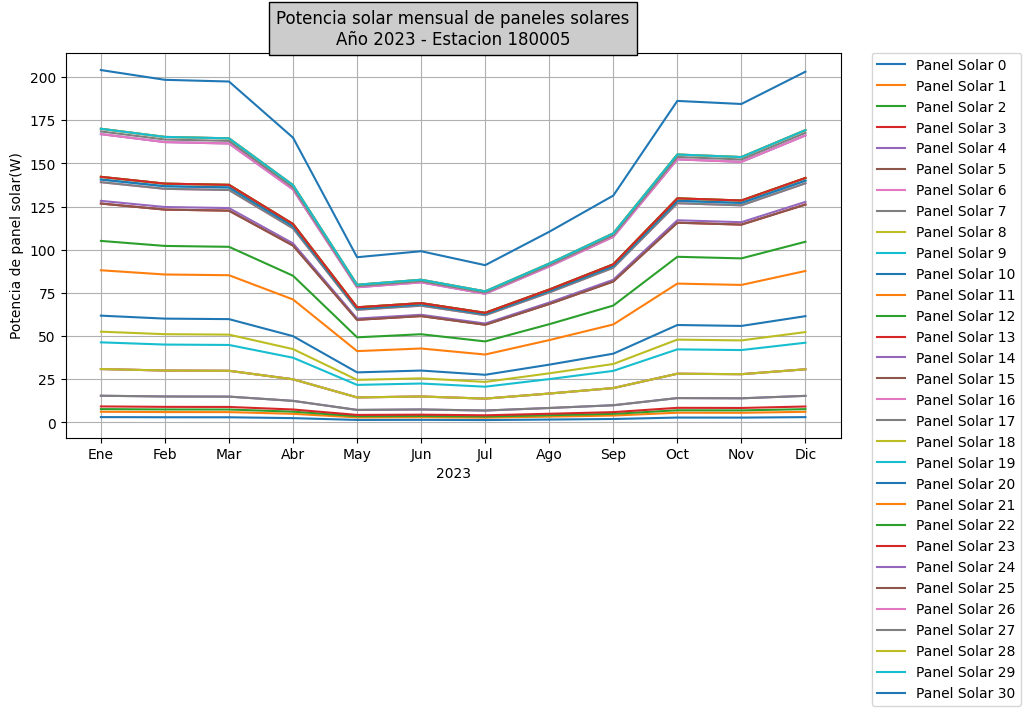

In [36]:
#Velocidad del viento promedio del año, medida por mes.

meses = ["Ene","Feb","Mar","Abr","May","Jun","Jul","Ago","Sep","Oct","Nov","Dic"]
paneles = []
for x in range(solar.shape[0]):
    paneles.append("Panel Solar "+str(x))

i=2
meanDf = pd.DataFrame(index=range(solar.shape[0]), columns=meses)
display(ids[0])
est = bigDf.query('ID_Estacion == '+ids[i])
for x in range(1,13):
    filtered_df = est[est['momento'].dt.month == x]
    for y in range(len(paneles)):
        #display(paneles[y])
        meanDf.loc[y,meses[x-1]] = filtered_df[paneles[y]].mean()

meanDf = meanDf.T

plt.rcParams['figure.figsize'] = [10, 5]

for panel in range(len(paneles)):
    plt.plot(meses, meanDf[panel], label = paneles[panel]) 

plt.xlabel("2023")
plt.ylabel("Potencia de panel solar(W)")
plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)
plt.title("Potencia solar mensual de paneles solares\nAño 2023 - Estacion "+ids[i], bbox={'facecolor':'0.8', 'pad':5})
plt.grid()
plt.show()

'550001'

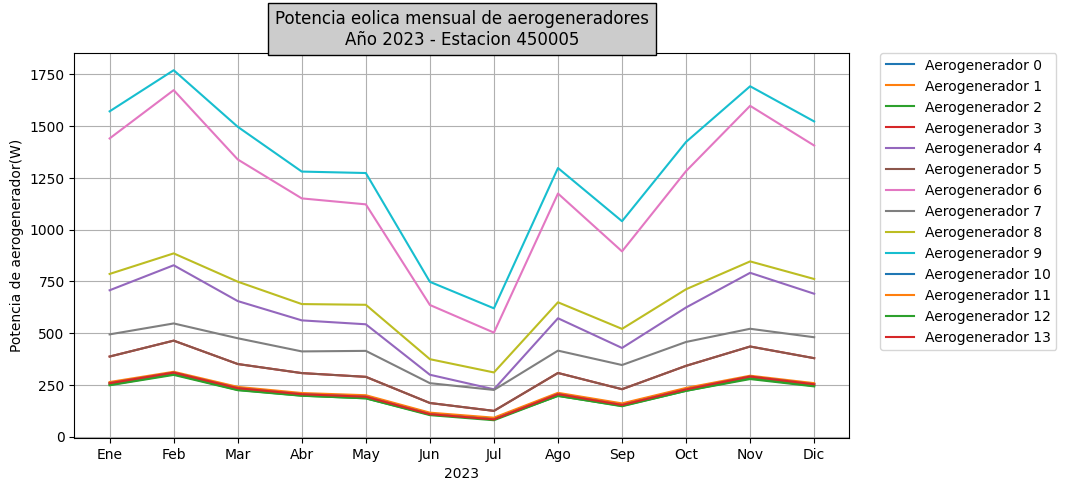

In [46]:
#Velocidad del viento promedio del año, medida por mes.

meses = ["Ene","Feb","Mar","Abr","May","Jun","Jul","Ago","Sep","Oct","Nov","Dic"]
paneles = []
for x in range(aero.shape[0]):
    paneles.append("Aerogenerador "+str(x))
i = 11

meanDf = pd.DataFrame(index=range(aero.shape[0]), columns=meses)
display(ids[4])
est = bigDf.query('ID_Estacion == '+ids[i])
for x in range(1,13):
    filtered_df = est[est['momento'].dt.month == x]
    for y in range(len(paneles)):
        #display(paneles[y])
        meanDf.loc[y,meses[x-1]] = filtered_df[paneles[y]].mean()

meanDf = meanDf.T

plt.rcParams['figure.figsize'] = [10, 5]

for panel in range(len(paneles)):
    plt.plot(meses, meanDf[panel], label = paneles[panel]) 

plt.xlabel("2023")
plt.ylabel("Potencia de aerogenerador(W)")
plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)
plt.title("Potencia eolica mensual de aerogeneradores\nAño 2023 - Estacion "+ids[i], bbox={'facecolor':'0.8', 'pad':5})
plt.grid()
plt.show()

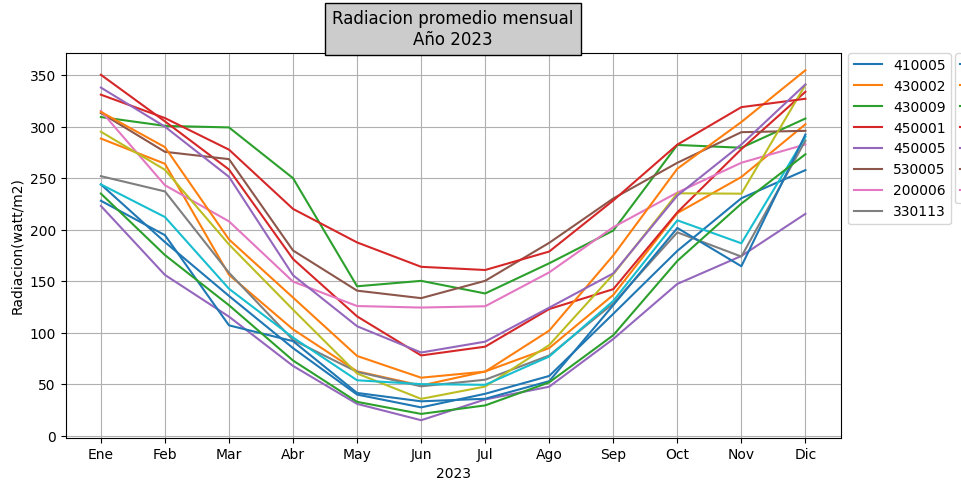

In [72]:
#Radiacion promedio de cada estacion a lo largo del año.

meanDf = pd.DataFrame(columns=ids)
for x in range(1,13):
    filtered_df = bigDf[bigDf['momento'].dt.month == x]
    temp = pd.DataFrame(columns=ids)
    for id in ids:
        est = filtered_df.query('ID_Estacion == '+id)
        temp[id] = [est["RadGInst (watt/m2)"].mean()]
    if(meanDf.size == 0):
        meanDf = pd.concat([temp], ignore_index=True)
    else:
        meanDf = pd.concat([meanDf,temp], ignore_index=True)

meanDf

meses = ["Ene","Feb","Mar","Abr","May","Jun","Jul","Ago","Sep","Oct","Nov","Dic"]

for id in ids:
    plt.plot(meses, meanDf[id], label = id) 

half = ids[:int(len(ids)/2)]
half2 = ids[int(len(ids)/2):]

plt.xlabel("2023")
plt.ylabel("Radiacion(watt/m2)")
plt.grid()

leg = plt.legend(bbox_to_anchor=(1.28, 1), labels=half, borderaxespad=0)
plt.gca().add_artist(leg)

plt.legend(bbox_to_anchor=(1.01, 1), labels=half2, borderaxespad=0)

plt.title("Radiacion promedio mensual\nAño 2023", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

In [99]:

col = (round(random.uniform(0,1),3),round(random.uniform(0,1),3),round(random.uniform(0,1),3))
a = mpColors.rgb2hex(col, keep_alpha=False)

display(widgets.HTML("""
<style>
.my-label-style label {
    color: """+a+""" !important;
    font-weight: bold !important;
}
</style>
"""))

print(a)

errChk = widgets.Checkbox(description="Desviacion estandar?", value=True, indent=False, layout={'width':'90%'}, _dom_classes=["my-label-style"])

display(errChk)

HTML(value='\n<style>\n.my-label-style label {\n    color: #c22448 !important;\n    font-weight: bold !importa…

#c22448


Checkbox(value=True, description='Desviacion estandar?', indent=False, layout=Layout(width='90%'), _dom_classe…